In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.core.pylabtools import figsize     #figsize(11, 9)
# mathjax en local : <script src="file:///C:/MathJax/MathJax.js?config=TeX-AMS_HTML">

# La loi (faible) des grands nombres

Ceci est un bloc de texte :
<img src="bernoulli_congres_math_suisse_1994.jpg" width = 400 />
Jacob Bernoulli est le découvreur de la loi des grands nombres


wikipedia Caspar_Neumann
In 1689 he became vicar of St. Maria Magdalen, Breslau. His observations on the city's mortality rates resulted in the treatise “Reflexionen über Leben und Tod bey denen in Breslau Geborenen und Gestorbenen” which he finally sent to Leibniz – the covering letter is documented, the text itself is lost. Leibniz seems to have informed the Royal Society of Neumann's work. The society's secretary Henri Justel invited Neumann in 1691 to provide the Society with the data he had collected. Neumann's mail is lost, Edmond Halley's computations digesting Neumann's data have, however, survived – published in the Transactions of the Royal Society of 1693.

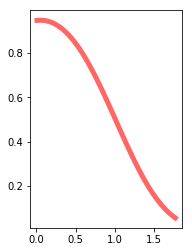

In [2]:
from scipy.stats import gompertz
# fig, ax = plt.subplots(1, 1)
c = 0.947
mean, var, skew, kurt = gompertz.stats(c, moments='mvsk')
x = np.linspace(gompertz.ppf(0.01, c),
    gompertz.ppf(0.99, c), 100)
plt.subplot(121)
plt.plot(x, gompertz.pdf(x, c),
    'r-', lw=5, alpha=0.6, label='gompertz pdf')

In [3]:
# from __future__ import division
import sympy as sy
x, y, z, t = sy.symbols('x y z t')
k, m, n = sy.symbols('k m n', integer=True)  # l pour lambda, donc decimal
f, g, h = sy.symbols('f g h', cls=sy.Function)

In [4]:
sy.diff(x**2/2, x), sy.limit(sy.sin(x)/x, x, 0), sy.integrate(1/x, x), sy.expand((x+y)**2), sy.factor(sy.expand((x+y)**2))

(x, 1, log(x), x**2 + 2*x*y + y**2, (x + y)**2)

Fiabilité du composant unitaire :

In [5]:
l = sy.Symbol('l')
r = sy.exp(-l*t)
f = 1-r
l1 = -sy.diff(r,t)/r
l1

l

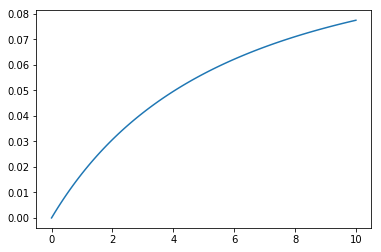

In [6]:
f1 = f
f2 = f
F = f1*f2
R = 1-F
L = -sy.diff(R,t)/R
pyL = sy.lambdify(t, L.subs('l',0.1), "numpy")
pyt = np.linspace(0,10,101)
plt.plot(pyt,pyL(pyt))

In [7]:
print(l)
r = sy.exp(-l*t)
f = 1-r
def L_par(f,n):
    "f(t)"
    F = f**n
    R = 1-F
    L = -sy.diff(R,t)/R
    return L
pyL1 = sy.lambdify(t, L_par(f,1).subs('l',0.1), "numpy")
pyL2 = sy.lambdify(t, L_par(f,2).subs('l',0.1), "numpy")
pyL3 = sy.lambdify(t, L_par(f,3).subs('l',0.1), "numpy")
pyt = np.linspace(0,10,101)
#plt.plot(pyt,pyL1(pyt),pyt,pyL2(pyt),pyt,pyL3(pyt))
pyL1

l


<function _lambdifygenerated(t)>

In [8]:
pyL1([3,5])

0.1

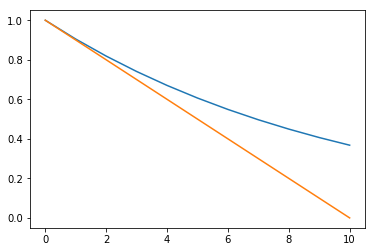

In [9]:
l = 0.1
expr = sy.exp(-l*x)
f = sy.lambdify(x, expr, "numpy")
a = np.arange(11)
plt.plot(a,f(a),a,1-l*a)

# Signal et Bruit

array([6., 4.])

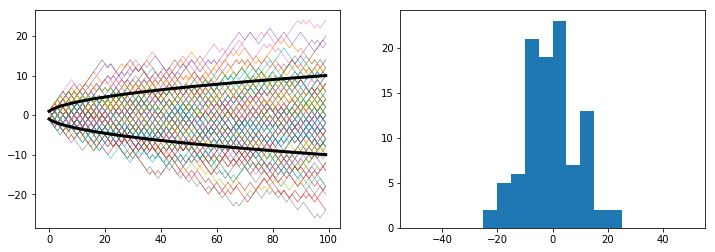

In [10]:
nstep, ntra = 100,100
#noise = np.random.randn(nstep,ntra)
#noise_01 = np.random.randint(2,size=(nstep,ntra))
#noise_pm1 = (noise_01-0.5)*2
noise = np.random.choice((-1,1),size=(nstep,ntra))
int_noise = noise.cumsum(axis=0) ### car pour plot une courbe est une colonne
sqrt_i = np.sqrt(np.arange(1,nstep+1))
fig = plt.figure()
fsz = fig.get_size_inches()
fig.set_size_inches((fsz[0]*2,fsz[1]))
#plt.figure(figsize=(12,4))
plt.subplot(121)
plt.plot(int_noise, lw=0.5)
plt.plot(np.column_stack((sqrt_i, -sqrt_i)), c='black', lw=3.0)
plt.subplot(122)
_ = plt.hist(int_noise[-1,:],bins=20, range=(-nstep/2,nstep/2))
# np.vstack((stdev, -stdev))
#int_noise
#foo = np.arange(100).reshape(4,25)
#t = np.arange(25)
#_ = [plt.plot(l) for l in foo]
fsz

hello world $E = m c^2$

In [11]:
import libHamming

ModuleNotFoundError: No module named 'libHamming'

Text(60, 9, 'noise')

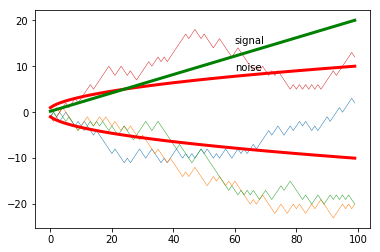

In [12]:
plt.plot(int_noise[:,0:4], lw=0.5)
plt.plot(np.column_stack((sqrt_i, -sqrt_i)), c='red', lw=3.0)
plt.plot(0.2*np.arange(1,nstep+1), c='green', lw=3.0)
plt.text(60,15,'signal')
plt.text(60,9,'noise')